### Capstone Project - The Battle of the Neighborhoods (Week 2)(Final Week)

Applied Data Science Capstone by IBM/Coursera

Analyst: Joey Tse

### Introduction: Business Problem 

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening a Chinese restaurant in Amsterdam, Netherlands.

Since there are lots of restaurants in Amsterdam we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no Chinese restaurants in vicinity. We would also prefer locations as close to city center as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

### Data 

Based on definition of our problem, factors that will influence our decission are:

- number of existing restaurants in the neighborhood (any type of restaurant)
- number of and distance to Chinese restaurants in the neighborhood, if any
- distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:

- centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using Google Maps API reverse geocoding
- number of restaurants and their type and location in every neighborhood will be obtained using Foursquare API
- coordinate of Amsterdam center will be obtained using Google Maps API geocoding of well known Amsterdam location

### Import reqired libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
# pip install geopy

In [3]:
from geopy.geocoders import Nominatim

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_of_Amsterdam').text 
source
soup = BeautifulSoup(source, 'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Neighbourhoods of Amsterdam - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b6838abb-69a6-407e-bfd6-1fe0e15001ff","wgCSPNonce":!1,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_of_Amsterdam","wgTitle":"Neighbourhoods of Amsterdam","wgCurRevisionId":645887402,"wgRevisionId":645887402,"wgArticleId":3311930,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Neighbourhoods in the Netherlands by city","Geography of Amsterdam","Boroughs of Amsterdam"],"wgPage

In [5]:
df = pd.read_csv("C:/Users/yeeyee/OneDrive/offical/2021_ Self Learning Certificate/3 IBM/C10/a.csv")
df

,A
0,Admiralenbuurt
1,Amsteldorp
2,Amsterdam Oud-West
3,Amsterdam Oud-Zuid
4,Amsterdam Science Park
5,Apollobuurt
6,Betondorp
7,Bijlmermeer
8,Binnenstad (Amsterdam)
9,Bos en Lommer


In [6]:
df = df.rename(columns={"A":"Neighborhood"})
df

,Neighborhood
0,Admiralenbuurt
1,Amsteldorp
2,Amsterdam Oud-West
3,Amsterdam Oud-Zuid
4,Amsterdam Science Park
5,Apollobuurt
6,Betondorp
7,Bijlmermeer
8,Binnenstad (Amsterdam)
9,Bos en Lommer


In [7]:
df.shape

(106, 1)

In [8]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = df['Neighborhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Amsterdam, Netherlands'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])


In [9]:
adf = df
adf['Latitude'] = lat
adf['Longitude'] = lng
adf.head(10)

,Neighborhood,Latitude,Longitude
0,Admiralenbuurt,52.372752,4.856359
1,Amsteldorp,52.339680,4.918740
2,Amsterdam Oud-West,52.365390,4.870220
3,Amsterdam Oud-Zuid,52.352350,4.877880
4,Amsterdam Science Park,52.354300,4.958010
5,Apollobuurt,52.350294,4.867990
6,Betondorp,52.423405,4.833395
7,Bijlmermeer,52.307031,4.969744
8,Binnenstad (Amsterdam),52.369930,4.907880
9,Bos en Lommer,52.379190,4.851740


### Set up FourSquare credentials

In [10]:
CLIENT_ID = 'GYVKTJPIMG0DTEEZWFQC50SDLTHWBSU0SPQJROXTGYA5ZEW1' # your Foursquare ID
CLIENT_SECRET = 'KOMNMP5AQQNR2S1PR1BX245BINZFP4NWCYFQGGPIOYKKDO2A' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYVKTJPIMG0DTEEZWFQC50SDLTHWBSU0SPQJROXTGYA5ZEW1
CLIENT_SECRET:KOMNMP5AQQNR2S1PR1BX245BINZFP4NWCYFQGGPIOYKKDO2A


In [11]:
# get Latitude and Longitude of Amsterdam
from geopy.geocoders import Nominatim

address = 'Amsterdam, Netherlands'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


In [12]:
# plot the map
adf_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(adf['Latitude'], adf['Longitude'], adf['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(adf_map)  
    
adf_map

In [13]:
adf.loc[0, 'Neighborhood']

'Admiralenbuurt'

In [14]:
neighborhood_latitude = adf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = adf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = adf.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Admiralenbuurt are 52.37275173538222, 4.856358900371928.


In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=GYVKTJPIMG0DTEEZWFQC50SDLTHWBSU0SPQJROXTGYA5ZEW1&client_secret=KOMNMP5AQQNR2S1PR1BX245BINZFP4NWCYFQGGPIOYKKDO2A&v=20180604&ll=52.37275173538222,4.856358900371928&radius=500&limit=100'

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60accacda44feb4cb35198a3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Stadsdeel West',
  'headerFullLocation': 'Stadsdeel West, Amsterdam',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 52.37725173988222,
    'lng': 4.863715888847818},
   'sw': {'lat': 52.368251730882214, 'lng': 4.849001911896039}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5c363b588c812a002c66f664',
       'name': 'Sapporo Ramen Sora',
       'location': {'lat': 52.371294,
        'lng': 4.855144,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.371294,
          'lng': 4.855144}],
       

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-18-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Sapporo Ramen Sora,Ramen Restaurant,52.371294,4.855144
1,Deli-caat,Deli / Bodega,52.371221,4.856056
2,Rein Cityspa,Spa,52.371217,4.855969
3,Café Cook,Pub,52.371208,4.852792
4,Maz Mez,Lebanese Restaurant,52.371231,4.857968


In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


### Explore Neighborhoods in Amsterdam

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
#  run the above function on each neighborhood and create a new dataframe
a_venues = getNearbyVenues(names=adf['Neighborhood'],
                                   latitudes=adf['Latitude'],
                                   longitudes=adf['Longitude']
                                  )

Admiralenbuurt
Amsteldorp
Amsterdam Oud-West
Amsterdam Oud-Zuid
Amsterdam Science Park
Apollobuurt
Betondorp
Bijlmermeer
Binnenstad (Amsterdam)
Bos en Lommer
Buiksloot
Buikslotermeer
Buitenveldert
Bullewijk
Burgwallen Nieuwe Zijde
Burgwallen Oude Zijde
Chass?buurt
Cruquiuseiland
Czaar Peterbuurt
Dapperbuurt
De Aker
De Pijp
De Wallen
Diamantbuurt (Amsterdam)
Duivelseiland (Amsterdam)
Eastern Docklands
Eendracht (Amsterdam)
Floradorp
Frederik Hendrikbuurt
Gaasperdam
Geuzenveld
Gouden Reael
Grachtengordel
Haarlemmerbuurt (Amsterdam)
Hoofddorppleinbuurt
Houthaven
IJburg
Indische Buurt
Java-eiland
Jodenbuurt
Jordaan
Kadijken
Kadoelen
Kinkerbuurt
KNSM Island
Kolenkit District
Landelijk Noord
Landlust
Lastage
Middelveldsche Akerpolder
Molenwijk (Amsterdam)
Museumkwartier (Amsterdam)
NDSM
Negen Straatjes
Nieuw Sloten
Nieuwe Pijp
Nieuwendam
Nieuwendammerdijk en Buiksloterdijk
Olympisch Kwartier
Omval
Oostelijke Eilanden
Oosterdokseiland
Oosterparkbuurt (Amsterdam)
Oostoever
Oostpoort
Oostzanerw

In [22]:
print(a_venues.shape)
a_venues.head()

(4128, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Admiralenbuurt,52.372752,4.856359,Sapporo Ramen Sora,52.371294,4.855144,Ramen Restaurant
1,Admiralenbuurt,52.372752,4.856359,Deli-caat,52.371221,4.856056,Deli / Bodega
2,Admiralenbuurt,52.372752,4.856359,Rein Cityspa,52.371217,4.855969,Spa
3,Admiralenbuurt,52.372752,4.856359,Café Cook,52.371208,4.852792,Pub
4,Admiralenbuurt,52.372752,4.856359,Maz Mez,52.371231,4.857968,Lebanese Restaurant


In [23]:
a_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Admiralenbuurt,45,45,45,45,45,45
Amsteldorp,13,13,13,13,13,13
Amsterdam Oud-West,88,88,88,88,88,88
Amsterdam Oud-Zuid,59,59,59,59,59,59
Amsterdam Science Park,6,6,6,6,6,6
Apollobuurt,25,25,25,25,25,25
Betondorp,9,9,9,9,9,9
Bijlmermeer,4,4,4,4,4,4
Binnenstad (Amsterdam),59,59,59,59,59,59


In [24]:
#  find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(a_venues['Venue Category'].unique())))

There are 294 uniques categories.


In [25]:
summary = a_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Neighborhood,Count
0,Westelijk Havengebied,1
1,Venserpolder,1
2,Ruigoord,3
3,Bijlmermeer,4
4,Nieuwendam,4


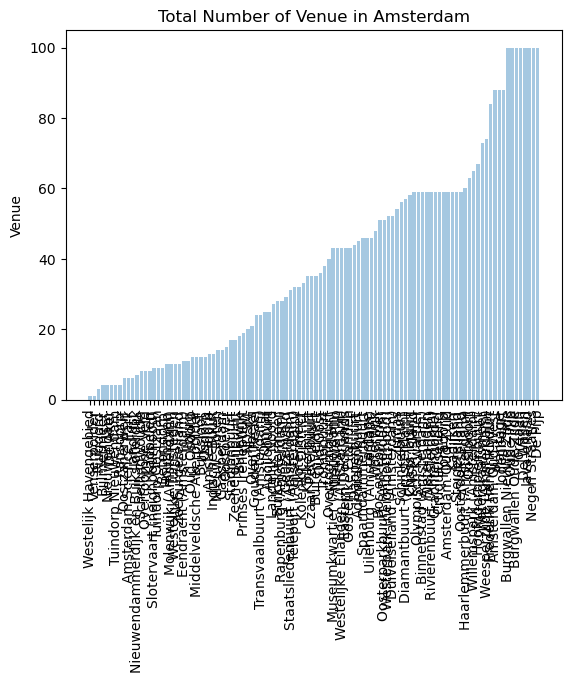

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Amsterdam')
plt.xticks(rotation=90)

plt.show()

### Analyze Each Neighborhood

In [27]:
# one hot encoding
a_onehot = pd.get_dummies(a_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
a_onehot['Neighborhood'] = a_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [a_onehot.columns[-1]] + list(a_onehot.columns[:-1])
a_onehot = a_onehot[fixed_columns]

a_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cycle Studio,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fraternity House,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nature Preserve,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,VR Cafe,V

In [28]:
a_onehot.shape

(4128, 294)

In [29]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
a_grouped = a_onehot.groupby('Neighborhood').mean().reset_index()
a_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cycle Studio,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fraternity House,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,VR Cafe,V

In [30]:
a_grouped.shape

(106, 294)

In [31]:
num_top_venues = 5

for hood in a_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = a_grouped[a_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Admiralenbuurt----
           venue  freq
0     Restaurant  0.07
1  Deli / Bodega  0.04
2    Supermarket  0.04
3            Bar  0.04
4    Coffee Shop  0.04


----Amsteldorp----
              venue  freq
0             Hotel  0.08
1         Gastropub  0.08
2      Cocktail Bar  0.08
3  Dutch Restaurant  0.08
4              Park  0.08


----Amsterdam Oud-West----
                venue  freq
0                Café  0.09
1         Coffee Shop  0.06
2          Restaurant  0.05
3  Italian Restaurant  0.05
4                 Bar  0.03


----Amsterdam Oud-Zuid----
        venue  freq
0  Restaurant  0.14
1       Hotel  0.10
2         Bar  0.07
3      Bakery  0.05
4       Plaza  0.05


----Amsterdam Science Park----
               venue  freq
0           Bus Stop  0.33
1  Convenience Store  0.17
2                Spa  0.17
3         Restaurant  0.17
4        Coffee Shop  0.17


----Apollobuurt----
                venue  freq
0               Hotel  0.12
1  Italian Restaurant  0.08
2              

4            Café  0.02


----Middelveldsche Akerpolder----
            venue  freq
0      Restaurant  0.17
1  Ice Cream Shop  0.08
2             Pub  0.08
3     Comedy Club  0.08
4    Hockey Field  0.08


----Molenwijk (Amsterdam)----
                    venue  freq
0                Bus Stop   0.4
1             Supermarket   0.2
2           Shopping Mall   0.1
3               Bookstore   0.1
4  Furniture / Home Store   0.1


----Museumkwartier (Amsterdam)----
                venue  freq
0         Zoo Exhibit  0.12
1                 Bar  0.07
2                Café  0.07
3  Turkish Restaurant  0.05
4              Market  0.05


----NDSM----
             venue  freq
0       Restaurant  0.10
1  Harbor / Marina  0.10
2    Boat or Ferry  0.10
3           Bakery  0.05
4   Ice Cream Shop  0.05


----Negen Straatjes----
                venue  freq
0                 Bar  0.09
1               Hotel  0.06
2  Italian Restaurant  0.05
3         Yoga Studio  0.04
4                Café  0.04


----Ni

In [32]:
# write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = a_grouped['Neighborhood']

for ind in np.arange(a_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(a_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiralenbuurt,Restaurant,Café,Deli / Bodega,Snack Place,Bar,Supermarket,Coffee Shop,Pub,Falafel Restaurant,Beer Garden
1,Amsteldorp,Hotel,Italian Restaurant,Brasserie,Sports Club,Dutch Restaurant,French Restaurant,Café,Furniture / Home Store,Gastropub,Park
2,Amsterdam Oud-West,Café,Coffee Shop,Italian Restaurant,Restaurant,Bar,Hotel,Grocery Store,Gym / Fitness Center,Yoga Studio,Ice Cream Shop
3,Amsterdam Oud-Zuid,Restaurant,Hotel,Bar,Bakery,Plaza,Cosmetics Shop,French Restaurant,Juice Bar,Concert Hall,Soup Place
4,Amsterdam Science Park,Bus Stop,Coffee Shop,Spa,Convenience Store,Restaurant,Ethiopian Restaurant,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store


### Cluster Neighborhoods

In [34]:
# set number of clusters
kclusters = 10

a_grouped_clustering = a_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(a_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([8, 8, 8, 8, 5, 8, 0, 9, 0, 8])

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

a_merged = adf

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
a_merged = a_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

a_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiralenbuurt,52.372752,4.856359,8,Restaurant,Café,Deli / Bodega,Snack Place,Bar,Supermarket,Coffee Shop,Pub,Falafel Restaurant,Beer Garden
1,Amsteldorp,52.339680,4.918740,8,Hotel,Italian Restaurant,Brasserie,Sports Club,Dutch Restaurant,French Restaurant,Café,Furniture / Home Store,Gastropub,Park
2,Amsterdam Oud-West,52.365390,4.870220,8,Café,Coffee Shop,Italian Restaurant,Restaurant,Bar,Hotel,Grocery Store,Gym / Fitness Center,Yoga Studio,Ice Cream Shop
3,Amsterdam Oud-Zuid,52.352350,4.877880,8,Restaurant,Hotel,Bar,Bakery,Plaza,Cosmetics Shop,French Restaurant,Juice Bar,Concert Hall,Soup Place
4,Amsterdam Science Park,52.354300,4.958010,5,Bus Stop,Coffee Shop,Spa,Convenience Store,Restaurant,Ethiopian Restaurant,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store


In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(a_merged['Latitude'], a_merged['Longitude'], a_merged['Neighborhood'], a_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

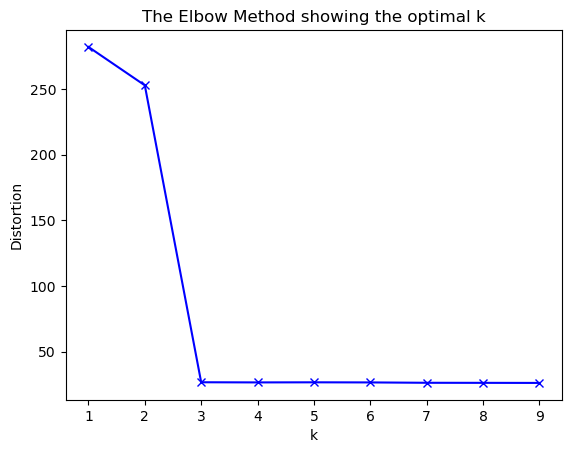

In [37]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(a_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(a_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / a_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Examine Clusters

In [38]:
# cluster 1
a_merged.loc[a_merged['Cluster Labels'] == 0, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Betondorp,0,Furniture / Home Store,Market,Museum,Historic Site,Dutch Restaurant,Art Gallery,Seafood Restaurant,Empanada Restaurant,Doner Restaurant,Drugstore
8,Binnenstad (Amsterdam),0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum
17,Cruquiuseiland,0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum
27,Floradorp,0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum
32,Grachtengordel,0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum
41,Kadijken,0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum
44,KNSM Island,0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum
48,Lastage,0,Bar,Hotel,History Museum,Pizza Place,Café,Garden,Jewelry Store,Bike Rental / Bike Share,Bistro,Botanical Garden
55,Nieuwe Pijp,0,Zoo Exhibit,Restaurant,Bar,Museum,Breakfast Spot,History Museum,Gastropub,Plaza,Planetarium,Pizza Place
58,Olympisch Kwartier,0,Bar,Restaurant,Hostel,Breakfast Spot,Café,Pizza Place,Museum,Italian Restaurant,Hotel,History Museum


In [39]:
# cluster 2
a_merged.loc[a_merged['Cluster Labels'] == 1, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Venserpolder,1,Restaurant,Zoo,Event Service,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant


In [40]:
# cluster 3
a_merged.loc[a_merged['Cluster Labels'] == 2, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Buiksloot,2,Supermarket,Bus Stop,Park,Restaurant,Drugstore,Shopping Mall,Turkish Restaurant,Café,Bakery,Empanada Restaurant
11,Buikslotermeer,2,Supermarket,Convenience Store,Clothing Store,Electronics Store,Hotel,Seafood Restaurant,Sporting Goods Shop,Snack Place,Shopping Mall,Bus Stop
26,Eendracht (Amsterdam),2,Soccer Field,Bus Stop,Baseball Field,Cafeteria,General Entertainment,Stadium,Snack Place,Event Space,Garden,Athletics & Sports
31,Gouden Reael,2,Gym / Fitness Center,Supermarket,Playground,Shop & Service,French Restaurant,Liquor Store,Tennis Court,Dog Run,Bakery,Drugstore
37,Indische Buurt,2,Snack Place,Playground,Video Store,Bath House,Shoe Store,Bus Stop,Chinese Restaurant,Grocery Store,Indonesian Restaurant,Ice Cream Shop
42,Kadoelen,2,Bus Stop,Road,Stables,Boat or Ferry,Harbor / Marina,Bakery,Grocery Store,Ethiopian Restaurant,Doner Restaurant,Drugstore
47,Landlust,2,Coffee Shop,Playground,Bus Stop,Park,Train Station,Supermarket,Zoo,Empanada Restaurant,Doner Restaurant,Drugstore
54,Nieuw Sloten,2,Tram Station,Chinese Restaurant,Grocery Store,Bakery,Furniture / Home Store,Paper / Office Supplies Store,Drugstore,Food Truck,Supermarket,Liquor Store
57,Nieuwendammerdijk en Buiksloterdijk,2,Pharmacy,Plaza,Bus Stop,Park,Harbor / Marina,Smoke Shop,Snack Place,Electronics Store,Dog Run,Doner Restaurant
65,Oostzanerwerf,2,BBQ Joint,Grocery Store,Flower Shop,Pier,Supermarket,Soccer Field,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store


In [41]:
# cluster 4
a_merged.loc[a_merged['Cluster Labels'] == 3, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Nieuwendam,3,Garden,Dog Run,Plaza,Skating Rink,Zoo,Empanada Restaurant,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store
91,Tuindorp Nieuwendam,3,Garden,Dog Run,Plaza,Skating Rink,Zoo,Empanada Restaurant,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store


In [42]:
# cluster 5
a_merged.loc[a_merged['Cluster Labels'] == 4, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,Westelijk Havengebied,4,Boat or Ferry,Zoo,Event Space,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit


In [43]:
# cluster 6
a_merged.loc[a_merged['Cluster Labels'] == 5, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Amsterdam Science Park,5,Bus Stop,Coffee Shop,Spa,Convenience Store,Restaurant,Ethiopian Restaurant,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store
50,Molenwijk (Amsterdam),5,Bus Stop,Supermarket,Bookstore,Furniture / Home Store,Shopping Mall,Pharmacy,Zoo,Empanada Restaurant,Drugstore,Dutch Restaurant


In [44]:
# cluster 7
a_merged.loc[a_merged['Cluster Labels'] == 6, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Ruigoord,6,Coffee Shop,Bar,Zoo,Event Service,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant


In [45]:
# cluster 8
a_merged.loc[a_merged['Cluster Labels'] == 7, a_merged.columns[[0] + [3] + list(range(4, a_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
72,Overtoomse Veld,7,Supermarket,Fast Food Restaurant,Gym,Drugstore,Sandwich Place,Nightclub,Dog Run,Doner Restaurant,Dutch Restaurant,Electronics Store


In [61]:
a_grouped_c = a_grouped.groupby('Neighborhood')['Chinese Restaurant'].max().reset_index()
a_grouped_c1 = a_grouped_c[a_grouped_c['Chinese Restaurant']>0]
a_grouped_c1

,Neighborhood,Chinese Restaurant
0,Admiralenbuurt,0.022222
3,Amsterdam Oud-Zuid,0.016949
15,Burgwallen Oude Zijde,0.030000
21,De Pijp,0.010000
22,De Wallen,0.030000
23,Diamantbuurt (Amsterdam),0.035088
29,Gaasperdam,0.071429
31,Gouden Reael,0.041667
33,Haarlemmerbuurt (Amsterdam),0.033333
37,Indische Buurt,0.076923


In [62]:
a_grouped_c1.shape

(21, 2)

Run to cluster 8 would be stop since k=7 with many locations to be shown, it would bother our selection of location to start business